# Structural evolution of H1.0

In [1]:
# Imports
import sys
import json
import pandas as pd
import os
import mdtraj as md
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

sys.path.append('../../src')
import data_utils
import analyse_utils
import simulate_utils

## Data preparation

In [2]:
# Getting previous experiment json
metadata_path = f'../ortho_h1-0/ortho_h1-0.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)
templates = pd.DataFrame(metadata['templates']).transpose()
data = pd.DataFrame(metadata['data']).transpose()

In [3]:
# Getting previous analysis results containing outlier definitions
ortho = pd.read_pickle('../ortho_h1-0/results/analysis.pkl')

In [4]:
# Filtering sequences by previous outlier definition
data = data[~ortho.outlier]
templates = templates.loc[data.index]

### Content consensus sequence

In [35]:
# Generating average sequence
avg = data_utils.average_sequence(data['sequence'])
avg

'KEAVAKASAKKSKKTKSKPAARVKEDVPAPTRVKPFKKPKASKSPVKKAKAAKPAAKKKKSSKKKLKKRTKGKPKGTAKPASKAPKKTAPKKAKAGKPKKVKAKATVPA'

In [36]:
# Saving sequence
avg_name = 'H1-0_AVG'
file_path = f'data/{avg_name}.fasta'
with open(file_path, 'w') as file:
    file.write(">" + avg_name + "\n")
    file.write(avg + "\n")

#### Terminally clustered sequence

In [29]:
# Generating terminally clustered sequence
avg_clust = data_utils.cluster_seq(avg, ['K', 'R'], ['D', 'E'], seed=0)

In [30]:
# Saving sequence
avg_clust_name = 'H1-0_AVG_CLUST'
file_path = f'data/{avg_clust_name}.fasta'
with open(file_path, 'w') as file:
    file.write(">" + avg_clust_name + "\n")
    file.write(avg_clust + "\n")

### Metadata

In [37]:
# Saving new experiment json
metadata['data'] = {
    avg_name: {'template': list(templates.index), 'sequence': avg, 'location': None, 'region': 'CTD', 'variant': 'Averaged'},
    avg_clust_name: {'template': list(templates.index), 'sequence': avg_clust, 'location': None, 'region': 'CTD', 'variant': 'Averaged and clustered charges'}
    }
metadata_path = f'idpevo_h1-0.json'
with open(metadata_path, 'w') as file:
    json.dump(metadata, file, indent=4)

## Analysis

In [2]:
# Loading metadata
metadata = analyse_utils.load_metadata('idpevo_h1-0.json', join=False)[0]
seq = metadata.iloc[0].sequence
metadata

,template,sequence,location,region,variant
H1-0_AVG,"[0_AUSLI, 1_CYPVA, 2_FUNHE, 3_KRYMA, 4_NOTFU, ...",KEAVAKASAKKSKKTKSKPAARVKEDVPAPTRVKPFKKPKASKSPV...,None,CTD,Averaged
H1-0_AVG_CLUST,"[0_AUSLI, 1_CYPVA, 2_FUNHE, 3_KRYMA, 4_NOTFU, ...",KKKKKKKKRKKKKKKKKKKKKKRKKKKKKKKRKKKKKKKKKKKKKV...,None,CTD,Averaged and clustered charges


In [5]:
plt.rcParams["font.family"] = "Liberation Sans"
plt.rcParams["font.weight"] = "normal"

### Sequence characteristics

#### CIDER parameters

In [2]:
# Calculating parameters
cider = analyse_utils.cider_parameters(metadata['sequence'])
cider['Length'] = metadata.sequence.str.len()
cider['Charge'] = (cider.Length * cider.NCPR).astype(int)

cider

NameError: name 'metadata' is not defined

#### Amino acid content

In [17]:
# Calculating frequencies
freqs = analyse_utils.amino_acid_content(metadata.sequence)

freqs

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
H1-0_AVG,0.201835,0.0,0.009174,0.018349,0.009174,0.027523,0.0,0.0,0.385321,0.009174,0.0,0.0,0.119266,0.0,0.027523,0.073394,0.055046,0.06422,0.0,0.0


In [20]:
# Calculating counts
(freqs * len(seq)).astype(int)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
H1-0_AVG,22,0,1,2,1,3,0,0,42,1,0,0,13,0,3,8,6,7,0,0


### Rg Evolution

In [4]:
# Loading data files
minevo_1 = pd.read_pickle('results/Francesco\'s algorithm/0_1/evolution.pkl')
minevo_2 = pd.read_pickle('results/Francesco\'s algorithm/0_2/evolution.pkl')
minevo_3 = pd.read_pickle('results/Francesco\'s algorithm/0_3/evolution.pkl')
minevo_4 = pd.read_pickle('results/Francesco\'s algorithm/0_4/evolution.pkl')
maxevo = pd.read_pickle('results/Francesco\'s algorithm/10/evolution.pkl')
consevo = pd.read_pickle('results/Francesco\'s algorithm/4.258203/evolution.pkl')

(0.0, 4396.35)

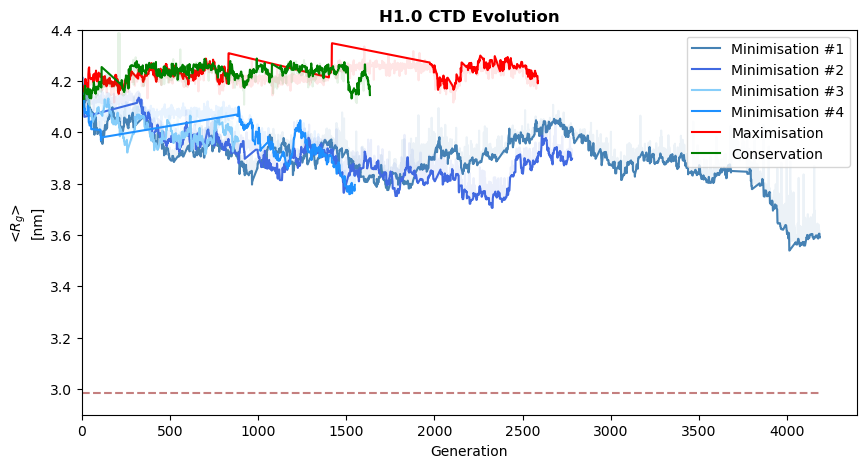

In [5]:
# Plotting results
plt.figure(figsize=(10,5))
plt.plot(minevo_1[minevo_1.mc].obs, label="Minimisation #1", c='steelblue')
plt.plot(minevo_1.obs, alpha=0.1, c='steelblue')

plt.plot(minevo_2[minevo_2.mc].obs, label="Minimisation #2", c='royalblue')
plt.plot(minevo_2.obs, alpha=0.1, c='royalblue')

plt.plot(minevo_3[minevo_3.mc].obs, label="Minimisation #3", c='lightskyblue')
plt.plot(minevo_3.obs, alpha=0.1, c='lightskyblue')

plt.plot(minevo_4[minevo_4.mc].obs, label="Minimisation #4", c='dodgerblue')
plt.plot(minevo_4.obs, alpha=0.1, c='dodgerblue')

plt.plot(maxevo[maxevo.mc].obs, label="Maximisation", c='red')
plt.plot(maxevo.obs, alpha=0.1, c='red')

plt.plot(consevo[consevo.mc].obs, label="Conservation", c='green')
plt.plot(consevo.obs, alpha=0.1, c='green')

plt.hlines(2.985, 0, len(minevo_1), color='darkred', linestyles='--', alpha=0.5)
plt.ylim(2.9,4.4)

plt.xlabel("Generation")
plt.ylabel("<$R_g$>\n[nm]")
plt.title("H1.0 CTD Evolution", fontweight='bold')
plt.legend(loc='upper right')
plt.xlim(0)


#### Minimization

In [44]:
cider = analyse_utils.cider_parameters(minevo_1[minevo_1.mc].apply(lambda row: ''.join(row.fasta), axis=1))
cider

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
0,0.182430,0.440367,0.385321,3.17156,0.917431
2,0.182430,0.440367,0.385321,3.17156,0.917431
3,0.182430,0.440367,0.385321,3.17156,0.917431
4,0.182430,0.440367,0.385321,3.17156,0.917431
6,0.191479,0.440367,0.385321,3.17156,0.917431
...,...,...,...,...,...
3091,0.302957,0.440367,0.385321,3.17156,0.917431
3092,0.316150,0.440367,0.385321,3.17156,0.917431
3094,0.279525,0.440367,0.385321,3.17156,0.917431
3097,0.308126,0.440367,0.385321,3.17156,0.917431


(3.4, 4.4)

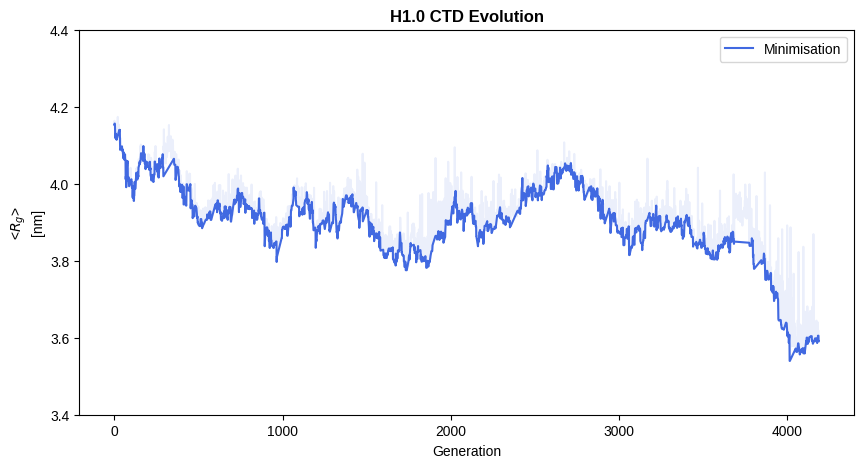

In [37]:
# Plotting results
plt.figure(figsize=(10,5))
plt.plot(minevo_1[minevo_1.mc].obs, label="Minimisation", c='royalblue')
plt.plot(minevo_1.obs, alpha=0.1, c='royalblue')

plt.xlabel("Generation")
plt.ylabel("<$R_g$>\n[nm]")
plt.legend()
plt.title("H1.0 CTD Evolution", fontweight='bold')
plt.ylim(3.4,4.4)


In [118]:
seqs = np.array(minevo_1.fasta.to_list())
charges = (np.zeros(shape=seqs.shape) + (seqs == 'K') + (seqs == 'R') - (seqs == 'D') - (seqs == 'E'))
charges

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

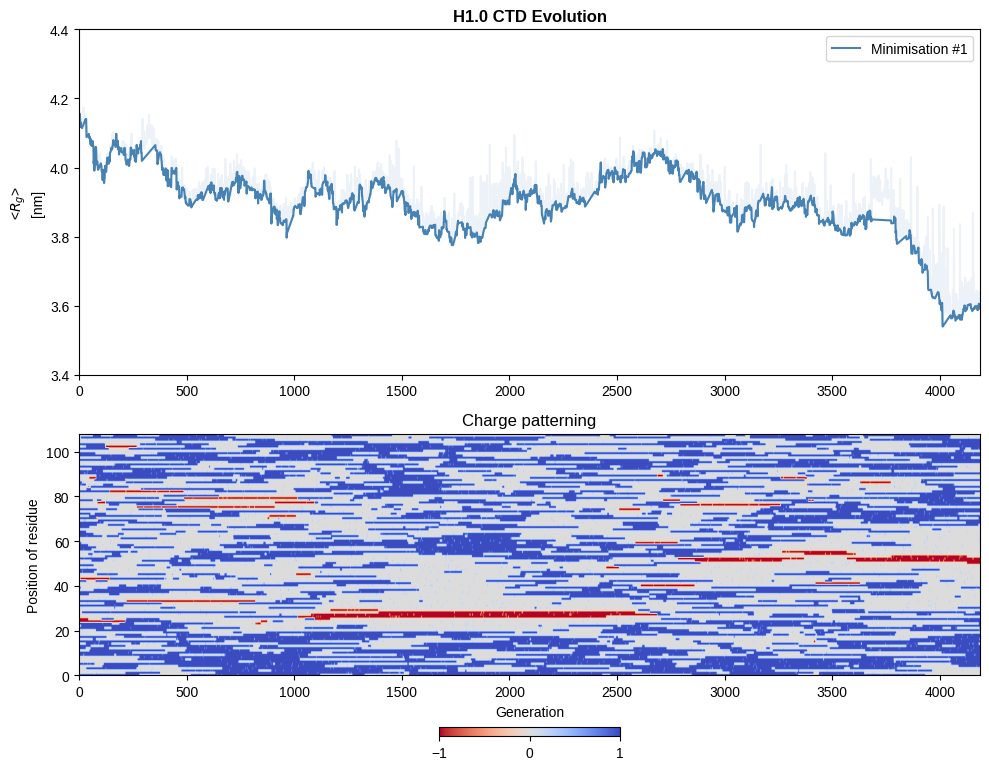

In [142]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
axes[0].plot(minevo_1[minevo_1.mc].obs, label="Minimisation #1", c='steelblue')
axes[0].plot(minevo_1.obs, alpha=0.1, c='steelblue')
axes[0].set_ylabel("<$R_g$>\n[nm]")
axes[0].legend()
axes[0].set_xlim(0, len(minevo_1))
axes[0].set_ylim(3.4,4.4)
axes[0].set_title("H1.0 CTD Evolution", fontweight='bold')

pos = axes[1].imshow(charges.T.astype(int), aspect='auto', cmap='coolwarm_r')
fig.colorbar(pos, ax=axes[1], ticks=[-1,0,1], location='bottom', shrink=0.2)
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Position of residue")
axes[1].set_title("Charge patterning")
axes[1].set_xlim(0)
axes[1].set_ylim(0,108)

plt.tight_layout()

In [43]:
# Finding most compact sequence
print(minevo_rep[minevo_rep.mc].obs.min())
print(minevo_rep[minevo_rep.obs == minevo_rep[minevo_rep.mc].obs.min()].fasta.str.join('').iloc[0])

3.7648602948169105
KKSKKKKKAKKKAKTKAKGKTAASPPAEVAEATPSVAAPSPGPDAVATFRSAPKAAKKKKKKGKSPKKAKSAPPVKAVPKAKVLKAKTKKKKKVKKAKRTKKKPSPRKA


In [7]:
kappas = minevo_1.apply(lambda row: analyse_utils.SequenceParameters(''.join(row.fasta)).get_kappa(), axis=1)

(4187,)

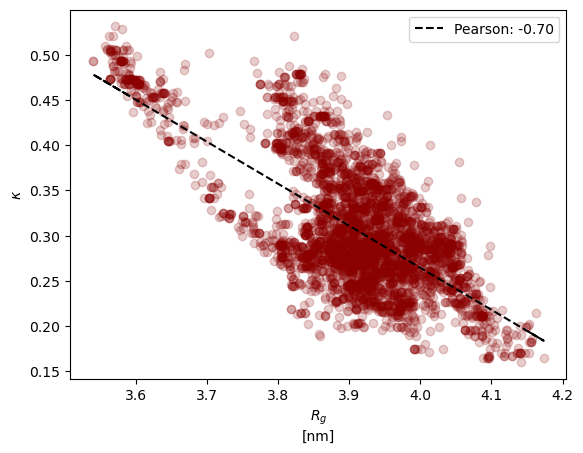

In [22]:
from scipy.stats import pearsonr
x = minevo_1.obs.astype(float)
y = kappas
corr, p_value = pearsonr(x, y)
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, x*slope+intercept, color='k', linestyle='--')
plt.scatter(x, y, alpha=0.2, color='darkred')
plt.scatter([0.92, 0.36, 0.75, 0.46, 0.11, 0.89, 0.55, 0.8, 0.14, 0.5, 0.18, 0.21, 0.4, 0.85, 0.07, 0.65, 0.3, 0.7, 0.27, 0.6])
plt.xlabel("$R_g$\n[nm]")
plt.ylabel("$\kappa$")
plt.legend([f"Pearson: {corr:.2f}"])
plt.show()


### Benchmarking against clustered charges

In [8]:
# Loading single simulation
avg_clust_traj = md.load_dcd("results/avg_clust/traj.dcd", "results/avg_clust/top.pdb")

In [45]:
# Calculating Rg
avg_clust_rg = analyse_utils.compute_rg(avg_clust_traj).mean()
avg_clust_rg

2.979121927960826

In [46]:
# Finding sequence
avg_clust_seq = ''.join(simulate_utils.extract_sequences(avg_clust_traj.topology).aa)
avg_clust_seq

'KKKKKKKKRKKKKKKKKKKKKKRKKKKKKKKRKKKKKKKKKKKKKVFSAPAAAPAAVVSPSSASPLAPVTTGAPPGTATPASAAPAATAPVPAAAGSPSAVPAVATEDE'

In [50]:
# Calculating cider parameters
avg_clust_cider = analyse_utils.cider_parameters(avg_clust_seq)
avg_clust_cider

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
0,0.995291,0.440367,0.385321,3.17156,0.917431


### Kappa Evolution

#### Initial min/max/cons

In [2]:
# Copy results to BINF
!scp -r "fend01:~/OrthoIDP/exp/idpevo_h1-0/results/min" results
!scp -r "fend01:~/OrthoIDP/exp/idpevo_h1-0/results/max" results
!scp -r "fend01:~/OrthoIDP/exp/idpevo_h1-0/results/cons" results

evolution.csv                                 100%   15MB  21.9MB/s   00:00    
evolution.csv                                 100%   15MB  23.0MB/s   00:00    
evolution.csv                                 100%   15MB  21.2MB/s   00:00    


In [179]:
# Loading results
minevo = pd.read_csv("results/min/evolution.csv")
minevo.target = 0
maxevo = pd.read_csv("results/max/evolution.csv")
maxevo.target = 1
consevo = pd.read_csv("results/cons/evolution.csv")
consevo.target = 0.1889910274293869

In [4]:
# Checking annealings
for evo in [minevo, maxevo, consevo]:
    print(f"At generation {len(evo)} with acceptance ratio {sum(evo.mc)/len(evo):.1%} and control parameter value of {evo.c.iloc[-1]} after {len(evo.c.unique())-1} annealings")

At generation 99991 with acceptance ratio 58.0% and control parameter value of 0.0001445751543497 after 458 annealings
At generation 99991 with acceptance ratio 50.6% and control parameter value of 0.0001445751543497 after 458 annealings
At generation 99991 with acceptance ratio 61.3% and control parameter value of 0.0001445751543497 after 458 annealings


(0.0, 1.0)

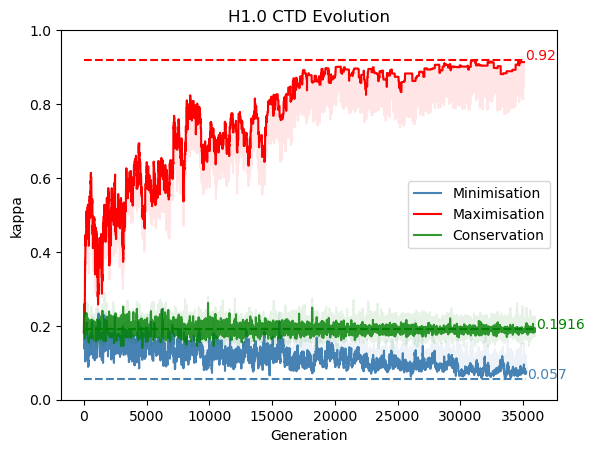

In [91]:
# Plotting results
plt.plot(minevo[minevo.mc].observable, label="Minimisation", c='steelblue', alpha=1)
plt.plot(minevo.observable, alpha=0.1, c='steelblue')
plt.hlines(minevo.observable.min(), 0, len(minevo), color='steelblue', linestyles='--')
plt.text(len(minevo)+100, minevo.observable.min(), f"{minevo.observable.min():.2}", color='steelblue')

plt.plot(maxevo[maxevo.mc].observable, label="Maximisation", c='red', alpha=1)
plt.plot(maxevo.observable, alpha=0.1, c='red')
plt.hlines(maxevo.observable.max(), 0, len(maxevo), color='red', linestyles='--')
plt.text(len(maxevo)+100, maxevo.observable.max(), f"{maxevo.observable.max():.2}", color='red')

plt.plot(consevo[consevo.mc].observable, label="Conservation", c='green', alpha=0.8)
plt.plot(consevo.observable, alpha=0.1, c='green')
plt.hlines(consevo.observable.mean(), 0, len(consevo), color='green', linestyles='--')
plt.text(len(consevo)+100, consevo.observable.mean(), f"{consevo.observable.mean():.4f}", color='green')

plt.xlabel("Generation")
plt.ylabel("kappa")
plt.title("H1.0 CTD Evolution")
plt.legend()
plt.ylim(0,1)


In [4]:
# Combining
minevo['evolution'] = "min"
maxevo['evolution'] = "max"
consevo['evolution'] = "cons"
allevo = pd.concat([minevo, maxevo, consevo]).reset_index(drop=True)

#### Kappa range targets

In [425]:
# Copy results to BINF
!scp -r "fend01:~/OrthoIDP/exp/idpevo_h1-0/results/range" results

evolution.csv                                 100%    0     0.0KB/s   00:00    
evolution.csv                                 100% 4095KB  23.0MB/s   00:00    
evolution.csv                                 100% 4094KB  22.6MB/s   00:00    
evolution.csv                                 100% 5926KB  22.8MB/s   00:00    
evolution.csv                                 100% 6400KB  21.2MB/s   00:00    
evolution.csv                                 100% 6401KB  22.5MB/s   00:00    
evolution.csv                                 100% 6327KB  23.3MB/s   00:00    
evolution.csv                                 100% 6274KB  22.8MB/s   00:00    
evolution.csv                                 100%    0     0.0KB/s   00:00    
evolution.csv                                 100% 6251KB  23.1MB/s   00:00    
evolution.csv                                 100% 6357KB  22.0MB/s   00:00    


In [4]:
# Loading results
evos = []
dir = 'results/range'
for target in os.listdir(dir):
    df = pd.read_csv(f"{dir}/{target}/evolution.csv")
    df['target'] = float(target)
    evos.append(df)
allevo = pd.concat(evos)
allevo

,generation,sequence,observable,mc,c,target
0,0,KKKEKKKPPAKAKAPAKTKAPPKASRSAKPAKGVKVKKDKKVKVAR...,0.034859,True,0.014427,0.7
1,1,KKKEKKKVPAKAKAPAKTKAPPKASRSAKPAKGPKVKKDKKVKVAR...,0.034859,True,0.014427,0.7
2,2,KKKEKKKVPAKAKAPAKPKATPKASRSAKPAKGPKVKKDKKVKVAR...,0.034859,True,0.014427,0.7
3,3,KKKEKKKVPAKAKAPAKPKATPKASRSAKPAKGPKVKKDAKVKVAR...,0.046477,True,0.014427,0.7
4,4,KKKEKKKVPAKAKAPAKPKATPKASRSAKPAKGPKVKKDAKVKVAR...,0.046477,True,0.014427,0.7
...,...,...,...,...,...,...
49986,49986,SAKAVKFPKATKVAKKKKKKKKKPVKAAKSTKGKKKTKKAKKKSKP...,0.400084,True,0.001444,0.4
49987,49987,SAKAVKFPKATKVAKKKKKKKKKPVKAAKSTKGKKKTKKAKKKSKP...,0.400084,True,0.001444,0.4
49988,49988,SAKAVKFPKATKVAKKKKKKKKKPVKAAKSTKGKKKTKKAKKKSKP...,0.400084,True,0.001444,0.4
49989,49989,SAKAVKFPKATKKAVKKKKKKKKPVKAAKSTKGKKKTKKAKKKSKP...,0.388019,False,0.001444,0.4


[]

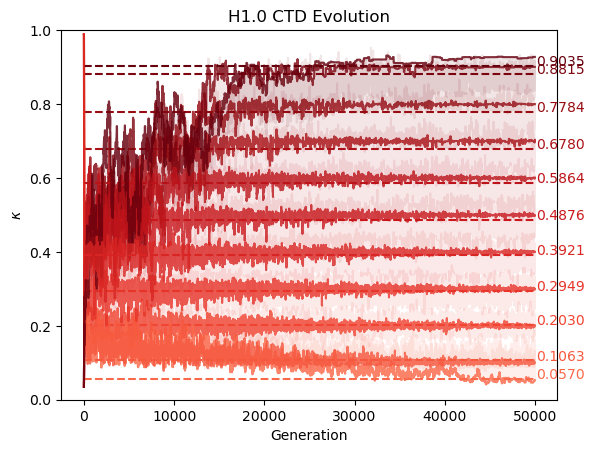

In [417]:
# Plotting results
from matplotlib.cm import ScalarMappable
from matplotlib import colormaps
scmap = ScalarMappable(plt.Normalize(-1,1), colormaps['Reds'])
for target in allevo.target.unique():
    evo = allevo[allevo.target == target]
    color = scmap.to_rgba(target)
    plt.plot(evo[evo.mc].observable, c=color, alpha=0.8)
    plt.plot(evo.observable, alpha=0.1, c=color)
    plt.hlines(evo.observable[-100:].mean(), 0, len(evo), color=color, linestyles='--')
    plt.text(len(evo)+100, evo.observable[-100:].mean(), f"{evo.observable[-100:].mean():.4f}", color=color)
plt.xlabel("Generation")
plt.ylabel("$\kappa$")
plt.title("H1.0 CTD Evolution")
plt.ylim(0,1)
plt.plot()

[]

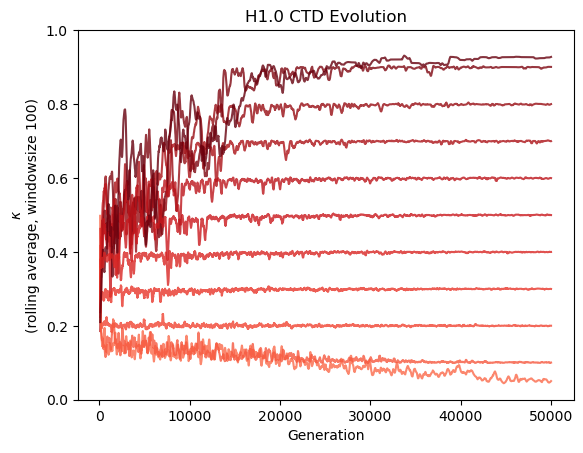

In [418]:
# Plotting results
from matplotlib.cm import ScalarMappable
from matplotlib import colormaps
scmap = ScalarMappable(plt.Normalize(-1,1), colormaps['Reds'])
for target in allevo.target.unique():
    evo = allevo[allevo.target == target]
    color = scmap.to_rgba(target)
    plt.plot(evo[evo.mc].observable.rolling(100).mean(), c=color, alpha=0.8)
plt.xlabel("Generation")
plt.ylabel("$\kappa$\n(rolling average, windowsize 100)")
plt.title("H1.0 CTD Evolution")
plt.ylim(0,1)
plt.plot()

Text(0.5, 1.0, 'Distribution of sequences - Range of targets from 0.0 to 1.0')

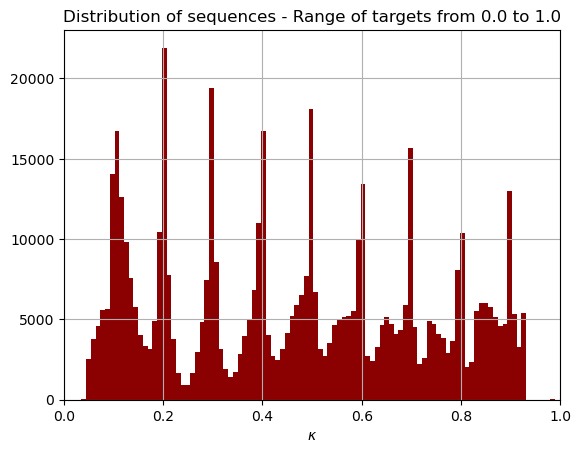

In [419]:
# Plotting distribution
ax = allevo.observable.hist(color='darkred', bins=100)
ax.set_ylabel(None)
ax.set_xlim(0,1)
ax.set_xlabel("$\kappa$")
ax.set_title("Distribution of sequences - Range of targets from 0.0 to 1.0")

Text(0.5, 1.0, 'Distribution of sequences - All kappa-targeted evolution')

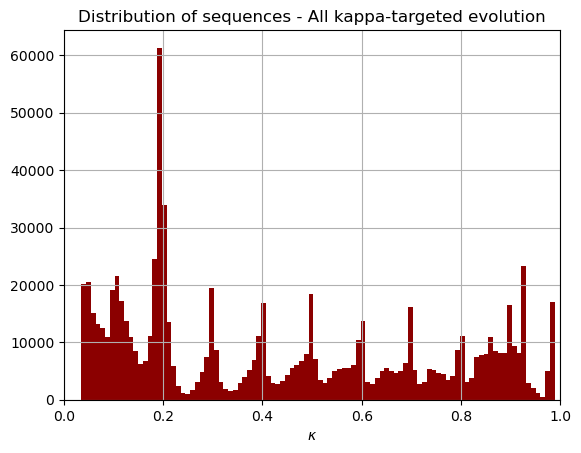

In [420]:
# Plotting distribution of all evolution
data = pd.concat([allevo, minevo, maxevo, consevo])
ax = data.observable.hist(color='darkred', bins=100)
ax.set_xlim(0,1)
ax.set_ylabel(None)
ax.set_xlabel("$\kappa$")
ax.set_title("Distribution of sequences - All kappa-targeted evolution")

#### Clustering

In [242]:
# Turning sequences to features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_matrix = one_hot_encoder.fit_transform(allevo.sequence.apply(list).apply(pd.Series))
one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_matrix).astype(int)


/tmp/ipykernel_17090/312071400.py:5: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_matrix).astype(int)


In [6]:
# Using kappa and sequences for clustering
features = pd.concat([allevo.observable, one_hot_df], axis=1)
seq_len = len(allevo.sequence[0])
features.columns = ["kappa"] + [aa + str(i+1) for i in range(seq_len) for aa in one_hot_encoder.categories_[0]]
features

,kappa,A1,D1,E1,F1,G1,K1,L1,P1,R1,...,E109,F109,G109,K109,L109,P109,R109,S109,T109,V109
0,0.182430,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.182430,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.182430,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.198234,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.197107,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299968,0.186276,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
299969,0.221721,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
299970,0.189357,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
299971,0.189288,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
# Using only kappa for clustering
features = pd.DataFrame(allevo.observable)
features.columns = ["kappa"]
features

,kappa
0,0.034859
1,0.034859
2,0.034859
3,0.046477
4,0.046477
...,...
49986,0.400084
49987,0.400084
49988,0.400084
49989,0.388019


In [236]:
# Calculating inertia
inertias = []
max_k = 20
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

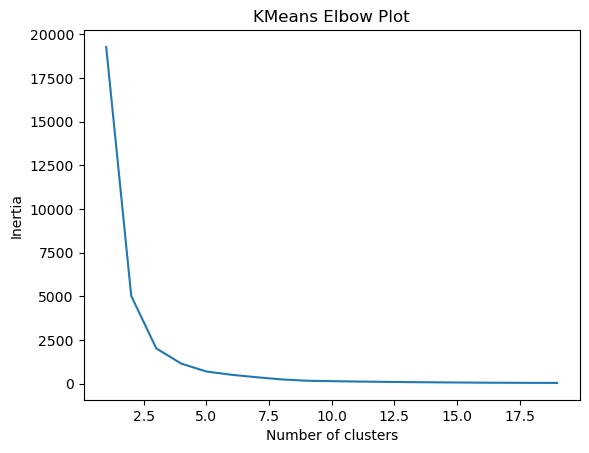

In [237]:
# Elbow plot
plt.plot(range(1, max_k), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Plot')
plt.show()

In [6]:
# Clustering
kmeans = KMeans(n_clusters=20)
kmeans.fit(features)

/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [ ]:
# Choosing centroid based on closest distance from fitted cluster center
centroid_sequences = []
centroid_idxs = []
for i in range(kmeans.n_clusters):

    centroid_fit = kmeans.cluster_centers_[i]#, 1:]
    cluster = one_hot_df.iloc[kmeans.labels_ == i]#, 1:]
    
    centroid_distance = (abs(cluster - centroid_fit)).sum(axis=1)
    centroid_idx = (centroid_distance.idxmin())
    centroid = allevo.sequence[centroid_idx]

    print(centroid)
    centroid_sequences.append(centroid)
    centroid_idxs.append(centroid_idx)

In [7]:
# Choosing centroid based on kappa from fitted cluster center
centroid_sequences = []
centroid_kappas = []
for i in range(kmeans.n_clusters):

    centroid_fit = kmeans.cluster_centers_[i]
    cluster = features.reset_index(drop=True).iloc[kmeans.labels_ == i]

    centroid_distance = abs(cluster - centroid_fit)
    centroid_idx = centroid_distance.kappa.idxmin()
    centroid = allevo.iloc[centroid_idx].sequence
    centroid_kappa = allevo.iloc[centroid_idx].observable

    print(centroid)
    centroid_sequences.append(centroid)
    centroid_kappas.append(centroid_kappa)

KAPAVKSKTKASPKPKKKKKKVKKKPSRPGKTPAPAAKAKKAAAEVKKKKKKRRKKKKKKDKKKKKKKKKKKAKAEASSTASVAAGFVASLATPTTGPAPAAPPASVPV
PKSAATKAPKKKTSPKKAGAKKSAKKAKKVKKVPAAAKVATSKVTLKAKAPAPKKKKKKAKPDAKVKRSRKPAAKAKKPKPARPKAEKKFKPTGEKKSPSSKGKVTAKV
APALSEAAPKKKKKKKKKRKKKKKKKKKKKKRKKKSSASAPVVEKPAATVAPVTAPPPKPTPATATPVPSGAAVGAGSTSDPKKFKKKKKKKKKRKKKKKVAAAASAAA
APAVSAKTKGKSAEAAKPASKKKVATDKAKRKKKTKKKAKSGVPVPAAPKASEKAPPKAPGVKKRKKKKRSKKKVKKKKAPFVATSPKKKAKLPPKTKAKKAKTPKSAA
VKVATKKAATKKKEVSKKEKKKRSSKVKPAKLKKAAAKAKPAKPRPAKKVPAPKTKAGRPKPAKSSSKKAFKVPKAGKGSPKTKAAKKDKKATKSKTAKAPKPAKAPVK
KSSSAFAPATSVVVTSPAAVTPKKGTKKKKKKKKRKKKKKKKKKKKRKKKKAKAAKKAKARKKAKKSPTKKKKKKKKLPPPAESAPPAPAAGAAVPVAATVDASAEGPP
PKKSAAAAAAAPAPVPSPKSASKKKAKKRKKKKTRSAKKETKTALPPAPTVKKVEPKASGTPKSAAAKDVFVVPPKKKKKKRKKKAAAPKSTKAGKVAKKKKKKKKGKK
PKKKKAGGALKKAPSASAVKKVAKKAKSTDGTAKPAKKPARPAVAVAAAAKKKKSPKKKKPVKKSAATAKRPPPKVVEATAPTKKEPFKKKTKSKKKKKKRPSKSKKKA
VKKKKKKKKRKKKKKKKKKKRKKKKKKKKKKRKKKKKATDAPPASASVTPPSATTPAVPAFSAPAAVAAAPVTTAAGVASVPPAPSGKKKKKKKKKSSAEEGLPAAPAA
PSKKKKKKKK

[]

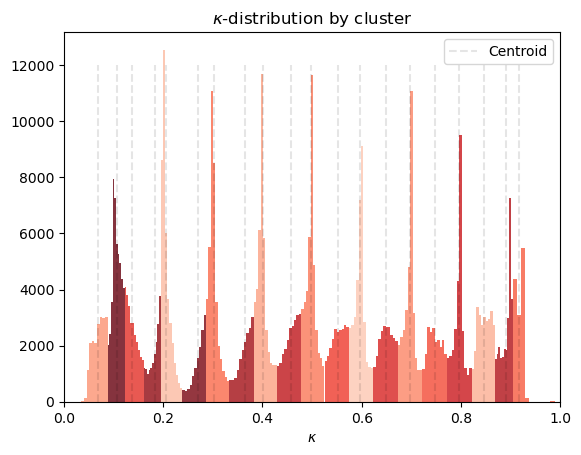

In [8]:
# Sanity checking clusters: Kappa
data = features[['kappa']].copy()
data['cluster'] = kmeans.labels_

# Plotting kappa distributions
from matplotlib.cm import ScalarMappable
from matplotlib import colormaps
scmap = ScalarMappable(plt.Normalize(-5,19), colormaps['Reds'])
for i in range(20):
    color = scmap.to_rgba(i)
    plt.hist(data[data.cluster == i].kappa, color=color, alpha=0.8)
plt.vlines(centroid_kappas, 0, 12000, color='k', alpha=0.1, linestyles='--', edgecolor='k', label='Centroid')
plt.legend()
plt.xlabel("$\kappa$")
plt.ylabel(None)
plt.title("$\kappa$-distribution by cluster")
plt.xlim(0,1)
plt.plot()

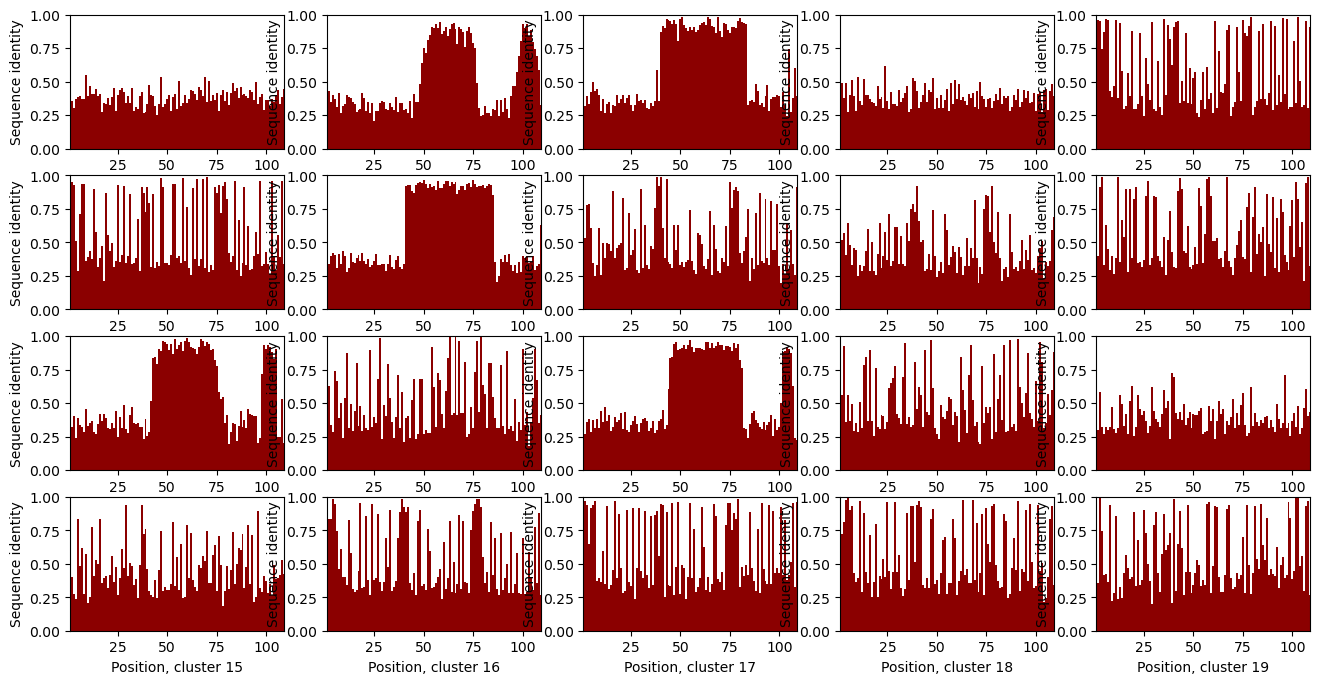

In [ ]:
# Sanity checking clusters: Sequence identity
dimensions = (4,5)
fig, axes = plt.subplots(*dimensions, figsize=(16,8))
c = 0
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        ax = axes[i,j]

        # Calculating sequence identity as interpreted from Bellay 2011
        seqs = np.array(allevo[kmeans.labels_ == c].sequence.apply(lambda s: list(s)).to_list())
        aas = np.array(analyse_utils.amino_acids)

        # Calculating frequency of amino acids in each position, choosing maximum frequency at each position as identity at that position, calculating mean identity
        identity = (seqs[:,:,np.newaxis] == aas).mean(axis=0).max(axis=1)

        # Plotting identity profile
        ax.bar(range(1, len(identity)+1), identity, color="darkred", width=1)
        ax.set_xlim(1, len(identity))
        ax.set_ylim(0,1)
        ax.set_xlabel(f"Position, cluster {c}")
        ax.set_ylabel("Sequence identity")

        c += 1

In [10]:
# Saving cluster sequences for ProTa-binding experiments
data_path = "../prota_variant/data"
for i in range(20):
    kappa = centroid_kappas[i]
    seq = centroid_sequences[i]
    id = f"H1-0_VAR_k{kappa:.2f}"
    print(id)
    desc = f"Artificial H1.0 variant with kappa-value of {kappa}"
    file_path = f'{data_path}/{id}.fasta'
    with open(file_path, 'w') as file:
        file.write(">" + id + " " + desc + "\n")
        file.write(seq + "\n")

H1-0_VAR_k0.60
H1-0_VAR_k0.21
H1-0_VAR_k0.85
H1-0_VAR_k0.40
H1-0_VAR_k0.07
H1-0_VAR_k0.70
H1-0_VAR_k0.50
H1-0_VAR_k0.30
H1-0_VAR_k0.92
H1-0_VAR_k0.75
H1-0_VAR_k0.55
H1-0_VAR_k0.14
H1-0_VAR_k0.65
H1-0_VAR_k0.80
H1-0_VAR_k0.46
H1-0_VAR_k0.89
H1-0_VAR_k0.36
H1-0_VAR_k0.18
H1-0_VAR_k0.27
H1-0_VAR_k0.11
